# Final Project Submission

- Student name: Henry Van Gorp
- Student pace: self paced
- Scheduled project review date/time:
- Instructor name: Abhineet Kulkarni
- Blog post URL: 

# Business Understanding

As COVID-19 continues to coincide with every day life, it is important to continue to educate about the positive affects of vaccinations.  As the push for vaccinations continues, it is important to remind the public of the seasonal flu vaccine.  In an effort to push for higher vaccination rate for the seasonal flu vaccine, a local non-profit is looking to understand how peoples backgrounds, opinions, and health behaviors are related to their personal vaccination patterns.  This will provide the necessary guidance for public health efforts as flue season approaches.

# Data Understanding

In late 2009 and early 2010, the United States conductes the NAtional 2009 H1N1 FLu Survey.  This survey was conducted through the phone and asked respondants if they had received the H1N1 and seasonal flu vaccines.  They were also asked questions about themselves.  The additional questions were to see their social, economic, and demographic background as well as opinion based questions.  The opinion based questions focused on risks of illness and vaccine effectiveness, and behaviors toward mitigating transmission.

To better utilize the data, this project focuses on just how the respondants answered the questions to the seasonal flu vaccine.

## Import Packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [2]:
data = pd.read_csv("training_set_features (2).csv")

In [3]:
data_labels = pd.read_csv("training_set_labels (1).csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [5]:
data_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [6]:
data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [7]:
data_labels.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


# Data Preperation

Join the two csv files.

In [8]:
data = pd.concat([data, data_labels], axis =1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

Drop columns which are not relevant to Seasonal Vaccine.  Drop all columns about H1N1.

In [10]:
data.drop(columns=['h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1', 'opinion_h1n1_vacc_effective',
                  'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'h1n1_vaccine'], inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   behavioral_antiviral_meds    26636 non-null  float64
 2   behavioral_avoidance         26499 non-null  float64
 3   behavioral_face_mask         26688 non-null  float64
 4   behavioral_wash_hands        26665 non-null  float64
 5   behavioral_large_gatherings  26620 non-null  float64
 6   behavioral_outside_home      26625 non-null  float64
 7   behavioral_touch_face        26579 non-null  float64
 8   doctor_recc_seasonal         24547 non-null  float64
 9   chronic_med_condition        25736 non-null  float64
 10  child_under_6_months         25887 non-null  float64
 11  health_worker                25903 non-null  float64
 12  health_insurance             14433 non-null  float64
 13  opinion_seas_vac

## Check Null Values

Check null values and clean columns in appropriate manner.  Once all null values are dealt
with the object columns will be dealt with.

In [12]:
data.isna().sum()

respondent_id                      0
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
rent_or_own                     2042
employment_status               1463
hhs_geo_region                     0
census_msa                         0
household_adults                 249
h

### health_insurance

Health Insurance has close to 50% of values missing.  The entire column will be dropped.

In [13]:
data['health_insurance'].value_counts()

1.0    12697
0.0     1736
Name: health_insurance, dtype: int64

In [14]:
data.health_insurance = data.health_insurance.fillna(value = "2")

### education

In the education column, drop rows which do not have education.

In [15]:
data['education'].value_counts()

College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: education, dtype: int64

In [16]:
data.dropna(axis=0, subset=['education'], inplace=True)

### household_adults

In the househould_adults column, drop rows witch are null.

In [17]:
data.dropna(axis=0, subset=['household_adults'], inplace=True)

### behavioral_antiviral_meds

In [18]:
data['behavioral_antiviral_meds'].value_counts()

0.0    24036
1.0     1188
Name: behavioral_antiviral_meds, dtype: int64

In [19]:
data.dropna(axis=0, subset=['behavioral_antiviral_meds'], inplace=True)

### behavioral_avoidance

In [20]:
data['behavioral_avoidance'].value_counts()

1.0    18281
0.0     6756
Name: behavioral_avoidance, dtype: int64

In [21]:
data.dropna(axis=0, subset=['behavioral_avoidance'], inplace=True)

### behavioral_face_mask

In [22]:
data['behavioral_face_mask'].value_counts()

0.0    23328
1.0     1693
Name: behavioral_face_mask, dtype: int64

In [23]:
data.dropna(axis=0, subset=['behavioral_face_mask'], inplace=True)

### behavioral_wash_hands

In [24]:
data['behavioral_wash_hands'].value_counts()

1.0    20681
0.0     4308
Name: behavioral_wash_hands, dtype: int64

In [25]:
data.dropna(axis=0, subset=['behavioral_wash_hands'], inplace=True)

### behavioral_large_gatherings

In [26]:
data['behavioral_large_gatherings'].value_counts()

0.0    16028
1.0     8897
Name: behavioral_large_gatherings, dtype: int64

In [27]:
data.dropna(axis=0, subset=['behavioral_large_gatherings'], inplace=True)

### behavioral_outside_home

In [28]:
data['behavioral_outside_home'].value_counts()

0.0    16547
1.0     8322
Name: behavioral_outside_home, dtype: int64

In [29]:
data.dropna(axis=0, subset=['behavioral_outside_home'], inplace=True)

### behavioral_touch_face

In [30]:
data['behavioral_touch_face'].value_counts()

1.0    16843
0.0     7937
Name: behavioral_touch_face, dtype: int64

In [31]:
data.dropna(axis=0, subset=['behavioral_touch_face'], inplace=True)

### doctor_recc_seasonal

In [32]:
data['doctor_recc_seasonal'].value_counts()

0.0    15298
1.0     7634
Name: doctor_recc_seasonal, dtype: int64

In [33]:
data.dropna(axis=0, subset=['doctor_recc_seasonal'], inplace=True)

### chronic_med_condition

In [34]:
data['chronic_med_condition'].value_counts()

0.0    16246
1.0     6501
Name: chronic_med_condition, dtype: int64

In [35]:
data.dropna(axis=0, subset=['chronic_med_condition'], inplace=True)

### child_under_6_months

In [36]:
data['child_under_6_months'].value_counts()

0.0    20858
1.0     1887
Name: child_under_6_months, dtype: int64

In [37]:
data.dropna(axis=0, subset=['child_under_6_months'], inplace=True)

### health_worker

In [38]:
data['health_worker'].value_counts()

0.0    20146
1.0     2589
Name: health_worker, dtype: int64

In [39]:
data.dropna(axis=0, subset=['health_worker'], inplace=True)

### opinion_seas_vacc_effective

In [40]:
data['opinion_seas_vacc_effective'].value_counts()

4.0    10151
5.0     8737
2.0     1882
1.0      997
3.0      937
Name: opinion_seas_vacc_effective, dtype: int64

In [41]:
data.dropna(axis=0, subset=['opinion_seas_vacc_effective'], inplace=True)

### Opinion Seasonal Risk

In [42]:
data['opinion_seas_risk'].value_counts()

2.0    7763
4.0    6725
1.0    5108
5.0    2595
3.0     497
Name: opinion_seas_risk, dtype: int64

In [43]:
data.dropna(axis=0, subset=['opinion_seas_risk'], inplace=True)

### Opinion Seasonal Sick From Vacc

In [44]:
data['opinion_seas_sick_from_vacc'].value_counts()

1.0    10358
2.0     6589
4.0     4214
5.0     1451
3.0       68
Name: opinion_seas_sick_from_vacc, dtype: int64

In [45]:
data.dropna(axis=0, subset=['opinion_seas_sick_from_vacc'], inplace=True)

### Income Poverty

Remove the rows with null values.  This is an object so we will create dummies once all null values
are dealt with in the data.

In [46]:
data['income_poverty'].value_counts()

<= $75,000, Above Poverty    11417
> $75,000                     6229
Below Poverty                 2379
Name: income_poverty, dtype: int64

In [47]:
data.dropna(axis=0, subset=['income_poverty'], inplace=True)

### marital_status

In [48]:
data['marital_status'].value_counts()

Married        10940
Not Married     9027
Name: marital_status, dtype: int64

In [49]:
data.dropna(axis=0, subset=['marital_status'], inplace=True)

### rent_or_own

In [50]:
data['rent_or_own'].value_counts()

Own     15095
Rent     4711
Name: rent_or_own, dtype: int64

In [51]:
data.dropna(axis=0, subset=['rent_or_own'], inplace = True)

### employment_status

In [52]:
data['employment_status'].value_counts()

Employed              11154
Not in Labor Force     7471
Unemployed             1141
Name: employment_status, dtype: int64

In [53]:
data.dropna(axis=0, subset=['employment_status'], inplace = True)

### Drop Columns

employment_history & emplotment_occupation have more null values than non null values.  These
columns will not be utilized and can be dropped from the dataset.

In [54]:
data['employment_industry'].value_counts()

fcxhlnwr    2060
wxleyezf    1551
ldnlellj    1009
pxcmvdjn     824
atmlpfrs     761
arjwrbjb     732
xicduogh     678
mfikgejo     518
rucpziij     431
xqicxuve     418
vjjrobsf     415
saaquncn     281
cfqqtusy     266
mcubkhph     228
nduyfdeo     216
dotnnunm     172
wlfvacwt     165
haxffmxo     129
msuufmds     110
phxvnwax      74
qnlwzans      11
Name: employment_industry, dtype: int64

In [55]:
data['employment_occupation'].value_counts()

xtkaffoo    1483
mxkfnird    1257
emcorrxb    1081
cmhcxjea    1059
xgwztkwe     865
hfxkjkmi     632
qxajmpny     429
xqwwgdyp     407
kldqjyjy     392
uqqtjvyb     369
tfqavkke     312
ukymxvdu     306
ccgxvspp     300
vlluhbov     290
bxpfxfdn     275
oijqvulv     260
rcertsgn     241
haliazsg     239
dlvbwzss     196
xzmlyyjv     193
hodpvpew     182
dcjcmpih     129
pvmttkik      73
Name: employment_occupation, dtype: int64

In [56]:
data.drop(columns=['employment_industry', 'employment_occupation', 'health_insurance'], inplace = True)

Recheck null values to see if any remain.

In [57]:
data.isna().sum()

respondent_id                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_adults               0
household_children             0
respondent_id                  0
seasonal_vaccine               0
dtype: int64

## Convert Object Types

There are multiple columns listed as having their data type being object.  Dummies will be created to fix this issue.

### age_group

In [58]:
data['age_group'].value_counts(normalize=True)

65+ Years        0.229485
55 - 64 Years    0.215370
45 - 54 Years    0.205454
18 - 34 Years    0.199383
35 - 44 Years    0.150309
Name: age_group, dtype: float64

In [59]:
age_group_data = data.groupby('age_group').mean()['seasonal_vaccine'].sort_values().reset_index()

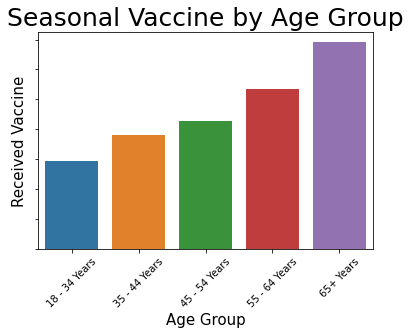

In [60]:
ax = sns.barplot(x = 'age_group', y = 'seasonal_vaccine', data=age_group_data)
ax.set_xlabel('Age Group', size = 15)
ax.set_ylabel('Received Vaccine', size = 15)
ax.set_title('Seasonal Vaccine by Age Group', size = 25)
ax.tick_params(axis='x', rotation=45)
ax.set(yticklabels=[]);

In [61]:
age_group_dummies = pd.get_dummies(data['age_group'], prefix='age', drop_first=True)

In [62]:
data = data.drop(['age_group'], axis=1)

In [63]:
data = pd.concat([data, age_group_dummies], axis=1)
data.head()

,respondent_id,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,...,hhs_geo_region,census_msa,household_adults,household_children,respondent_id,seasonal_vaccine,age_35 - 44 Years,age_45 - 54 Years,age_55 - 64 Years,age_65+ Years
0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,oxchjgsf,Non-MSA,0.0,0.0,0,0,0,0,1,0
1,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,bhuqouqj,"MSA, Not Principle City",0.0,0.0,1,1,1,0,0,0
3,3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,lrircsnp,"MSA, Principle City",0.0,0.0,3,1,0,0,0,1
4,4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,qufhixun,"MSA, Not Principle City",1.0,0.0,4,0,0,1,0,0
5,5,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,atmpeygn,"MSA, Principle City",2.0,3.0,5,0,0,0,0,1


### education

In [64]:
data['education'].value_counts(normalize=True)

College Graduate    0.415410
Some College        0.283467
12 Years            0.218102
< 12 Years          0.083021
Name: education, dtype: float64

In [65]:
education_data = data.groupby('education').mean()['seasonal_vaccine'].sort_values().reset_index()

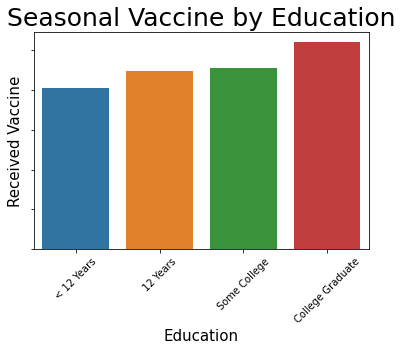

In [66]:
ax = sns.barplot(x = 'education', y = 'seasonal_vaccine', data=education_data)
ax.set_xlabel('Education', size = 15)
ax.set_ylabel('Received Vaccine', size = 15)
ax.set_title('Seasonal Vaccine by Education', size = 25)
ax.tick_params(axis='x', rotation=45)
ax.set(yticklabels=[]);

In [67]:
education_dummies = pd.get_dummies(data['education'], prefix='edu', drop_first=True)

In [68]:
data = data.drop(['education'], axis=1)

In [69]:
data = pd.concat([data, education_dummies], axis=1)
data.head()

,respondent_id,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,...,household_children,respondent_id,seasonal_vaccine,age_35 - 44 Years,age_45 - 54 Years,age_55 - 64 Years,age_65+ Years,edu_< 12 Years,edu_College Graduate,edu_Some College
0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0,0,0,0,1,0,1,0,0
1,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1,1,1,0,0,0,0,0,0
3,3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,3,1,0,0,0,1,0,0,0
4,4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,4,0,0,1,0,0,0,0,1
5,5,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,3.0,5,0,0,0,0,1,0,0,0


### race

In [70]:
data['race'].value_counts(normalize = True)

White                0.801427
Black                0.075129
Hispanic             0.065871
Other or Multiple    0.057574
Name: race, dtype: float64

In [71]:
race_data = data.groupby('race').mean()['seasonal_vaccine'].sort_values().reset_index()

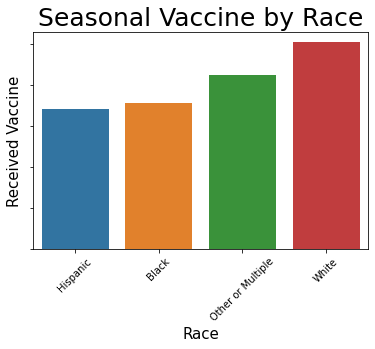

In [72]:
ax = sns.barplot(x = 'race', y = 'seasonal_vaccine', data=race_data)
ax.set_xlabel('Race', size = 15)
ax.set_ylabel('Received Vaccine', size = 15)
ax.set_title('Seasonal Vaccine by Race', size = 25)
ax.tick_params(axis='x', rotation=45)
ax.set(yticklabels=[]);

In [73]:
race_dummies = pd.get_dummies(data['race'], prefix='race', drop_first=True)

In [74]:
data = data.drop(['race'], axis=1)

In [75]:
data = pd.concat([data, race_dummies], axis=1)
data.head()

,respondent_id,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,...,age_35 - 44 Years,age_45 - 54 Years,age_55 - 64 Years,age_65+ Years,edu_< 12 Years,edu_College Graduate,edu_Some College,race_Hispanic,race_Other or Multiple,race_White
0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0,0,1,0,1,0,0,0,0,1
1,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
3,3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,1
4,4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,1
5,5,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,1


### sex

In [76]:
data['sex'].value_counts(normalize = True)

Female    0.591976
Male      0.408024
Name: sex, dtype: float64

In [77]:
sex_data = data.groupby('sex').mean()['seasonal_vaccine'].sort_values().reset_index()

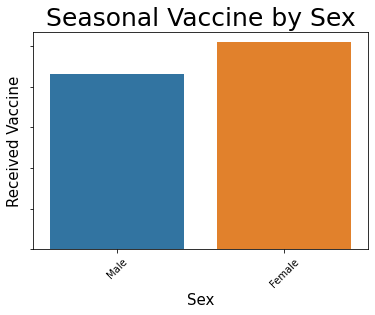

In [78]:
ax = sns.barplot(x = 'sex', y = 'seasonal_vaccine', data=sex_data)
ax.set_xlabel('Sex', size = 15)
ax.set_ylabel('Received Vaccine', size = 15)
ax.set_title('Seasonal Vaccine by Sex', size = 25)
ax.tick_params(axis='x', rotation=45)
ax.set(yticklabels=[]);

In [79]:
sex_dummies = pd.get_dummies(data['sex'], prefix='sex', drop_first=True)

In [80]:
data = data.drop(['sex'], axis=1)

In [81]:
data = pd.concat([data, sex_dummies], axis=1)
data.head()

,respondent_id,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,...,age_45 - 54 Years,age_55 - 64 Years,age_65+ Years,edu_< 12 Years,edu_College Graduate,edu_Some College,race_Hispanic,race_Other or Multiple,race_White,sex_Male
0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0,1,0,1,0,0,0,0,1,0
1,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1
3,3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0,0,1,0,0,0,0,0,1,0
4,4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1,0,0,0,0,1,0,0,1,0
5,5,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0,0,1,0,0,0,0,0,1,1


### income_poverty

In [82]:
data['income_poverty'].value_counts(normalize = True)

<= $75,000, Above Poverty    0.569109
> $75,000                    0.313265
Below Poverty                0.117626
Name: income_poverty, dtype: float64

In [83]:
income_poverty_data = data.groupby('income_poverty').mean()['seasonal_vaccine'].sort_values().reset_index()

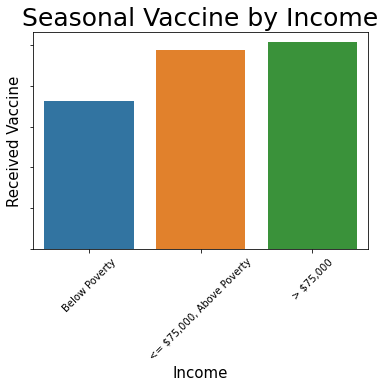

In [84]:
ax = sns.barplot(x = 'income_poverty', y = 'seasonal_vaccine', data=income_poverty_data)
ax.set_xlabel('Income', size = 15)
ax.set_ylabel('Received Vaccine', size = 15)
ax.set_title('Seasonal Vaccine by Income', size = 25)
ax.tick_params(axis='x', rotation=45)
ax.set(yticklabels=[]);

In [85]:
income_dummies = pd.get_dummies(data['income_poverty'], prefix='inc', drop_first=True)

In [86]:
data = data.drop(['income_poverty'], axis=1)

In [87]:
data = pd.concat([data, income_dummies], axis=1)
data.head()

,respondent_id,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,...,age_65+ Years,edu_< 12 Years,edu_College Graduate,edu_Some College,race_Hispanic,race_Other or Multiple,race_White,sex_Male,"inc_> $75,000",inc_Below Poverty
0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,1
1,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,1,1,0,1
3,3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1,0,0,0,0,0,1,0,0,1
4,4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,1,0,0,1,0,0,0
5,5,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1,0,0,0,0,0,1,1,0,0


### marital_status

In [88]:
data['marital_status'].value_counts(normalize = True)

Married        0.548315
Not Married    0.451685
Name: marital_status, dtype: float64

In [89]:
marital_data = data.groupby('marital_status').mean()['seasonal_vaccine'].sort_values().reset_index()

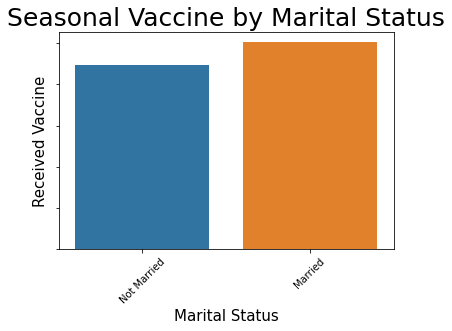

In [90]:
ax = sns.barplot(x = 'marital_status', y = 'seasonal_vaccine', data=marital_data)
ax.set_xlabel('Marital Status', size = 15)
ax.set_ylabel('Received Vaccine', size = 15)
ax.set_title('Seasonal Vaccine by Marital Status', size = 25)
ax.tick_params(axis='x', rotation=45)
ax.set(yticklabels=[]);

In [91]:
data['marital_status']=data['marital_status'].apply(lambda x: 1 if x == 'Married' else 0)

In [92]:
data['marital_status'].head()

0    0
1    0
3    0
4    1
5    1
Name: marital_status, dtype: int64

### rent_or_own

In [93]:
data['rent_or_own'].value_counts(normalize = True)

Own     0.762319
Rent    0.237681
Name: rent_or_own, dtype: float64

In [94]:
property_data = data.groupby('rent_or_own').mean()['seasonal_vaccine'].sort_values().reset_index()

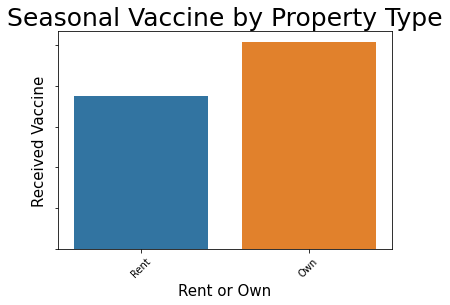

In [95]:
ax = sns.barplot(x = 'rent_or_own', y = 'seasonal_vaccine', data=property_data)
ax.set_xlabel('Rent or Own', size = 15)
ax.set_ylabel('Received Vaccine', size = 15)
ax.set_title('Seasonal Vaccine by Property Type', size = 25)
ax.tick_params(axis='x', rotation=45)
ax.set(yticklabels=[]);

In [96]:
data['rent_or_own']=data['rent_or_own'].apply(lambda x: 1 if x == 'Own' else 0)

### employment_status

In [97]:
data['employment_status'].value_counts(normalize = True)

Employed              0.564302
Not in Labor Force    0.377972
Unemployed            0.057725
Name: employment_status, dtype: float64

In [98]:
employment_data = data.groupby('employment_status').mean()['seasonal_vaccine'].sort_values().reset_index()

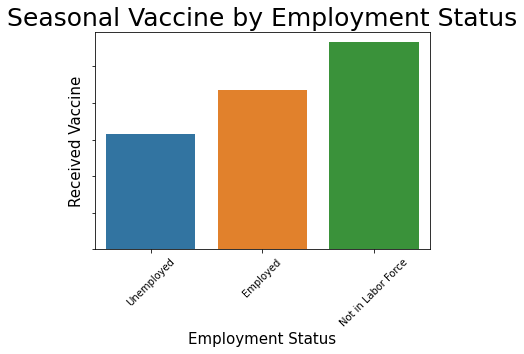

In [99]:
ax = sns.barplot(x = 'employment_status', y = 'seasonal_vaccine', data=employment_data)
ax.set_xlabel('Employment Status', size = 15)
ax.set_ylabel('Received Vaccine', size = 15)
ax.set_title('Seasonal Vaccine by Employment Status', size = 25)
ax.tick_params(axis='x', rotation=45)
ax.set(yticklabels=[]);

In [100]:
data['employment_status']=data['employment_status'].apply(lambda x: 1 if x == 'Employed' else 0)

### hhs_geo_region

In [101]:
data['hhs_geo_region'].value_counts(normalize = True)

lzgpxyit    0.157847
fpwskwrf    0.119043
qufhixun    0.117323
oxchjgsf    0.110543
bhuqouqj    0.108570
kbazzjca    0.104877
mlyzmhmf    0.084286
lrircsnp    0.078468
atmpeygn    0.077507
dqpwygqj    0.041536
Name: hhs_geo_region, dtype: float64

### census_msa

In [102]:
data['census_msa'].value_counts()

MSA, Not Principle  City    8619
MSA, Principle City         5759
Non-MSA                     5388
Name: census_msa, dtype: int64

In [103]:
census_data = data.groupby('census_msa').mean()['seasonal_vaccine'].sort_values().reset_index()

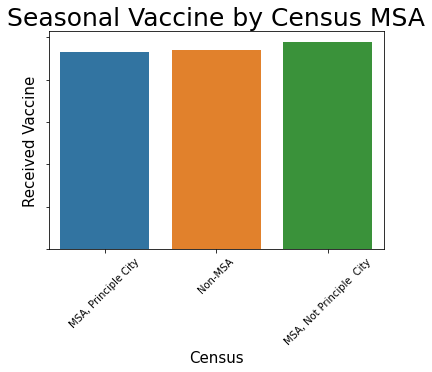

In [104]:
ax = sns.barplot(x = 'census_msa', y = 'seasonal_vaccine', data=census_data)
ax.set_xlabel('Census', size = 15)
ax.set_ylabel('Received Vaccine', size = 15)
ax.set_title('Seasonal Vaccine by Census MSA', size = 25)
ax.tick_params(axis='x', rotation=45)
ax.set(yticklabels=[]);

In [105]:
census_dummies = pd.get_dummies(data['census_msa'], prefix='cen', drop_first=True)

In [106]:
data = data.drop(['census_msa'], axis=1)

In [107]:
data = pd.concat([data, census_dummies], axis=1)
data.head()

,respondent_id,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,...,edu_College Graduate,edu_Some College,race_Hispanic,race_Other or Multiple,race_White,sex_Male,"inc_> $75,000",inc_Below Poverty,"cen_MSA, Principle City",cen_Non-MSA
0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,0,1,0,0,1,0,1
1,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,0,1,1,0,1,0,0
3,3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0,0,0,0,1,0,0,1,1,0
4,4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0,1,0,0,1,0,0,0,0,0
5,5,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,1,1,0,0,1,0


### Drop Column

hhs_geo_region is dropped form the data.

In [108]:
data.drop(columns=['hhs_geo_region'], inplace = True)

## Check Data

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19766 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                19766 non-null  int64  
 1   behavioral_antiviral_meds    19766 non-null  float64
 2   behavioral_avoidance         19766 non-null  float64
 3   behavioral_face_mask         19766 non-null  float64
 4   behavioral_wash_hands        19766 non-null  float64
 5   behavioral_large_gatherings  19766 non-null  float64
 6   behavioral_outside_home      19766 non-null  float64
 7   behavioral_touch_face        19766 non-null  float64
 8   doctor_recc_seasonal         19766 non-null  float64
 9   chronic_med_condition        19766 non-null  float64
 10  child_under_6_months         19766 non-null  float64
 11  health_worker                19766 non-null  float64
 12  opinion_seas_vacc_effective  19766 non-null  float64
 13  opinion_seas_ris

# Modeling

## Train Test Split

In [110]:
from sklearn.model_selection import train_test_split

X = data.drop("seasonal_vaccine", axis = 1)
y = data["seasonal_vaccine"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

## Scale the Data

In [111]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression

### Baseline Model

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

baseline_model = LogisticRegression(random_state=42)

baseline_neg_log_loss_cv = cross_val_score(baseline_model, X_train_scaled, y_train, scoring="neg_log_loss")

baseline_log_loss = -(baseline_neg_log_loss_cv.mean())
baseline_log_loss

0.47819857220329165

### Gridsearch on Logistic Regression

In [113]:
from sklearn.model_selection import GridSearchCV
logreg = LogisticRegression()
import warnings
warnings.filterwarnings('ignore')

log_param_grid = {
    'C':[0.01,.01,.1,1,10,100],
    'solver':['liblinear','lbfgs','newton-cg'],
    'penalty':['l1', 'l2']
}

log_grid_search = GridSearchCV(logreg, log_param_grid, cv=3, scoring='neg_log_loss')
print(log_grid_search)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg']},
             scoring='neg_log_loss')


In [114]:
log_grid_search.fit(X_train_scaled,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg']},
             scoring='neg_log_loss')

In [115]:
log_grid_search.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

### Logistic Regression Model 2

In [116]:
logreg = LogisticRegression(C=1,
                           penalty = 'l1',
                           solver = 'liblinear')
logreg.fit(X_train_scaled, y_train)

y_pred_log2 = logreg.predict(X_test_scaled)
print("neg_log_loss", logreg.score(X_test_scaled, y_test))

neg_log_loss 0.782476730068798


In [117]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_log2))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80      2582
           1       0.78      0.75      0.77      2360

    accuracy                           0.78      4942
   macro avg       0.78      0.78      0.78      4942
weighted avg       0.78      0.78      0.78      4942



## KNN

### Baseline Model

In [118]:
from sklearn.neighbors import KNeighborsClassifier

knn_baseline_model = KNeighborsClassifier()

knn_baseline_log_loss = -cross_val_score(knn_baseline_model, X_train_scaled, y_train, scoring="neg_log_loss").mean()
knn_baseline_log_loss

1.7621998374058159

### Gridsearch on KNN

In [119]:
knn_grid = {
    'n_neighbors': [1, 3, 7],
    'metric' : ['minkowski', 'manhattan'],
    'weights': ['uniform', 'distance']
}

In [120]:
knn_gs = GridSearchCV(estimator=knn_baseline_model, param_grid=knn_grid,
                      cv=5, n_jobs=1)

In [121]:
knn_gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': [1, 3, 7],
                         'weights': ['uniform', 'distance']})

In [122]:
knn_gs.best_params_

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

### KNN Model 2

In [123]:
knn_model_2 = KNeighborsClassifier(metric='manhattan',
                           n_neighbors = 7,
                           weights = 'distance')
knn_model_2.fit(X_train_scaled, y_train)

y_pred = knn_model_2.predict(X_test_scaled)
print("neg_log_loss", knn_model_2.score(X_test_scaled, y_test))

neg_log_loss 0.7339133953864833


In [124]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75      2582
           1       0.73      0.71      0.72      2360

    accuracy                           0.73      4942
   macro avg       0.73      0.73      0.73      4942
weighted avg       0.73      0.73      0.73      4942



## Random Forest

### Baseline Model

In [125]:
from sklearn.ensemble import RandomForestClassifier

rf_baseline_model = RandomForestClassifier()

rf_baseline_log_loss = -cross_val_score(rf_baseline_model, X_train_scaled, y_train, scoring="neg_log_loss").mean()
rf_baseline_log_loss

0.49617137759612157

### Gridsearch on Random Forest

In [126]:
rf_grid = { 
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,6,7],
    'criterion' :['gini', 'entropy']
}

In [127]:
rf_grid_search = GridSearchCV(estimator=rf_baseline_model,
                              param_grid=rf_grid, cv=5, n_jobs=1)

In [128]:
rf_grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]})

In [129]:
rf_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 300}

### Random Forest Model 2

In [130]:
rf_model_2 = RandomForestClassifier(criterion='entropy',
                                    max_depth=7,
                                    max_features='sqrt',
                                    n_estimators=300)
rf_model_2.fit(X_train_scaled, y_train)
y_pred_rf2 = rf_model_2.predict(X_test_scaled)
print("neg_log_loss", rf_model_2.score(X_test_scaled, y_test))

neg_log_loss 0.7770133549170376


In [131]:
print(classification_report(y_test, y_pred_rf2))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79      2582
           1       0.78      0.73      0.76      2360

    accuracy                           0.78      4942
   macro avg       0.78      0.78      0.78      4942
weighted avg       0.78      0.78      0.78      4942



## XG Boost

### Baseline Model

In [132]:
from xgboost import XGBClassifier

xgb_baseline_model = XGBClassifier()

xgb_baseline_log_loss = -cross_val_score(xgb_baseline_model, X_train_scaled, y_train, scoring="neg_log_loss").mean()
xgb_baseline_log_loss

0.5089414935551488

### Gridsearch on XG Boost

In [133]:
xgb_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [134]:
xgb_grid_search = GridSearchCV(estimator=xgb_baseline_model,
                               param_grid=xgb_grid, cv=5, n_jobs=1)

In [135]:
xgb_grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [136]:
xgb_grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 2,
 'n_estimators': 100,
 'subsample': 0.5}

### XG Boost Model 2

In [137]:
xgb_model_2 = XGBClassifier(learning_rate=0.1,
                                    min_child_weight=2,
                                    max_depth=6,
                                    subsample=0.5,
                                    n_estimators=100)
xgb_model_2.fit(X_train_scaled, y_train)
y_pred = xgb_model_2.predict(X_test_scaled)
print("neg_log_loss", xgb_model_2.score(X_test_scaled, y_test))

neg_log_loss 0.78328611898017


In [138]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      2582
           1       0.77      0.77      0.77      2360

    accuracy                           0.78      4942
   macro avg       0.78      0.78      0.78      4942
weighted avg       0.78      0.78      0.78      4942



# Best Model

## Logistic Regression Model 2

In [139]:
print(classification_report(y_test, y_pred_log2))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80      2582
           1       0.78      0.75      0.77      2360

    accuracy                           0.78      4942
   macro avg       0.78      0.78      0.78      4942
weighted avg       0.78      0.78      0.78      4942



## Coefficient Analysis

In [140]:
log_reg_coef = logreg.coef_

In [141]:
log_df = pd.DataFrame(data=log_reg_coef, columns=X_train.columns)
log_df.head()

,respondent_id,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,...,edu_College Graduate,edu_Some College,race_Hispanic,race_Other or Multiple,race_White,sex_Male,"inc_> $75,000",inc_Below Poverty,"cen_MSA, Principle City",cen_Non-MSA
0,0.00001,0.015206,-0.044903,0.007894,0.035052,0.010319,-0.034368,0.12863,0.591782,0.088624,...,0.112161,0.021146,0.015907,0.082681,0.121286,-0.001683,0.092465,-0.071883,-0.009359,-0.0537


In [142]:
log_dt_t = log_df.transpose()
log_dt_t

,0
respondent_id,0.000010
behavioral_antiviral_meds,0.015206
behavioral_avoidance,-0.044903
behavioral_face_mask,0.007894
behavioral_wash_hands,0.035052
behavioral_large_gatherings,0.010319
behavioral_outside_home,-0.034368
behavioral_touch_face,0.128630
doctor_recc_seasonal,0.591782
chronic_med_condition,0.088624


## Coefficient Charts

### opinion_seas_risk

People who responded saying that they viewed getting the seasonal flu as a risk are more likely to receive the vaccine.

In [143]:
opinion_risk_data = data.groupby('opinion_seas_risk').mean()['seasonal_vaccine'].sort_values().reset_index()

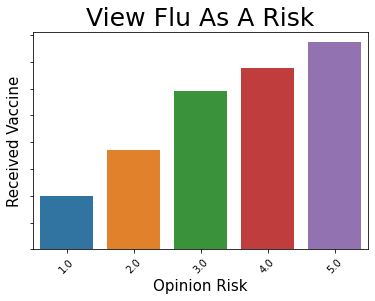

In [144]:
ax = sns.barplot(x = 'opinion_seas_risk', y = 'seasonal_vaccine', data=opinion_risk_data)
ax.set_xlabel('Opinion Risk', size = 15)
ax.set_ylabel('Received Vaccine', size = 15)
ax.set_title('View Flu As A Risk', size = 25)
ax.tick_params(axis='x', rotation=45)
ax.set(yticklabels=[]);

### opinion_seas_vacc_effective

People who responded saying that they viewed the seasonal flue vaccine as effective are more likely to receive the vaccine.

In [145]:
opinion_effective_data = data.groupby('opinion_seas_vacc_effective').mean()['seasonal_vaccine'].sort_values().reset_index()

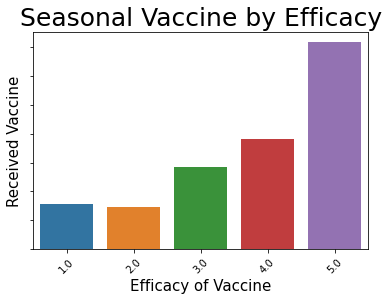

In [146]:
ax = sns.barplot(x = 'opinion_seas_vacc_effective', y = 'seasonal_vaccine', data=opinion_effective_data)
ax.set_xlabel('Efficacy of Vaccine', size = 15)
ax.set_ylabel('Received Vaccine', size = 15)
ax.set_title('Seasonal Vaccine by Efficacy', size = 25)
ax.tick_params(axis='x', rotation=45)
ax.set(yticklabels=[]);

### doctor_recc_seasonal

Peoplw who responded saying their doctor reccomended they receive the seasona flu vaccine are more likely to receive the vaccine.

In [147]:
docc_recc_data = data.groupby('doctor_recc_seasonal').mean()['seasonal_vaccine'].sort_values().reset_index()

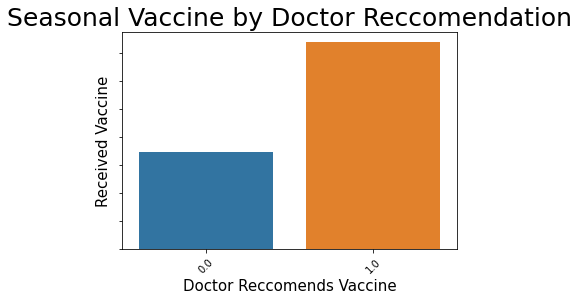

In [158]:
ax = sns.barplot(x = 'doctor_recc_seasonal', y = 'seasonal_vaccine', data=docc_recc_data)
ax.set_xlabel('Doctor Reccomends Vaccine', size = 15)
ax.set_ylabel('Received Vaccine', size = 15)
ax.set_title('Seasonal Vaccine by Doctor Reccomendation', size = 25)
ax.tick_params(axis='x', rotation=45)
ax.set(yticklabels=[]);

### age_group

Based on survey responses, those in higher age groups are more likely to recieve the seasonal flue vaccine.

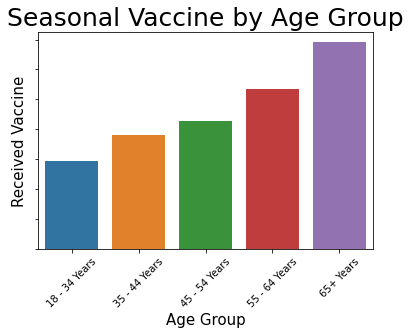

In [298]:
ax = sns.barplot(x = 'age_group', y = 'seasonal_vaccine', data=age_group_data)
ax.set_xlabel('Age Group', size = 15)
ax.set_ylabel('Received Vaccine', size = 15)
ax.set_title('Seasonal Vaccine by Age Group', size = 25)
ax.tick_params(axis='x', rotation=45)
ax.set(yticklabels=[]);

### inc_Below Poverty

In [149]:
below_poverty_data = data.groupby('inc_Below Poverty').mean()['seasonal_vaccine'].sort_values().reset_index()

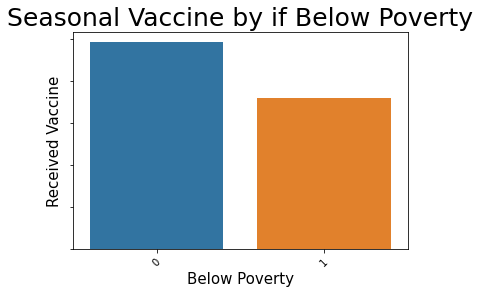

In [156]:
ax = sns.barplot(x = 'inc_Below Poverty', y = 'seasonal_vaccine', data=below_poverty_data)
ax.set_xlabel('Below Poverty', size = 15)
ax.set_ylabel('Received Vaccine', size = 15)
ax.set_title('Seasonal Vaccine by if Below Poverty', size = 25)
ax.tick_params(axis='x', rotation=45)
ax.set(yticklabels=[]);

In [153]:
employment_status_data = data.groupby('employment_status').mean()['seasonal_vaccine'].sort_values().reset_index()

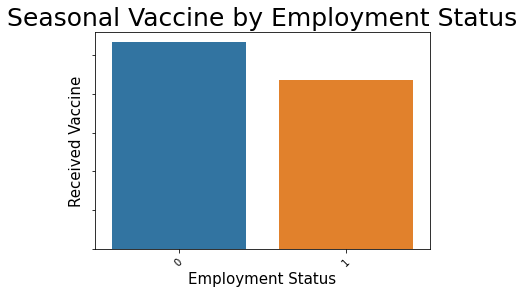

In [155]:
ax = sns.barplot(x = 'employment_status', y = 'seasonal_vaccine', data=employment_status_data)
ax.set_xlabel('Employment Status', size = 15)
ax.set_ylabel('Received Vaccine', size = 15)
ax.set_title('Seasonal Vaccine by Employment Status', size = 25)
ax.tick_params(axis='x', rotation=45)
ax.set(yticklabels=[]);

# Conclusion and Reccomendations

The model which is best fit for predicting if someone received the seasonal flu vaccine is the logistic regression model.  It will accurately predict 78% of the time if someone received the seasonal flu vaccine.

After modeling and EDA, it is the suggestion to the stakeholder to target three specific demographics in education and awareness prior to the next flu season
- Those who do not view the seasonal flu as a risk
- Those whose doctor does not recommend the vaccine
- Those who do not view the vaccine as effective
- Those who are in the age group of 18-34 years old